# NGUYỄN TRÍ SỰ: CLASSIFICATION MODELS & FINAL INTEGRATION 

## 1. IMPORT LIBRARIES

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report)
import pickle

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set2")

## 2. LOAD DATA

In [64]:
df = pd.read_csv('../data/processed/cleaned_data.csv')
print(f"\n Đã load data: {df.shape[0]:,} rows × {df.shape[1]} columns")


 Đã load data: 99,457 rows × 29 columns


## 3. CHUẨN BỊ DỮ LIỆU CHO CLASSIFICATION

In [65]:
print("\nCHỌN FEATURES VÀ TARGET:")
print("  Target: category (danh mục sản phẩm)")
print("  Features: age, gender, payment_method, shopping_mall, ")
print("           month, day_of_week, hour, is_weekend")

# Define features và target
feature_cols = ['age', 'gender_encoded', 'payment_method_encoded', 
                'shopping_mall_encoded', 'month', 'day_of_week', 
                'hour', 'is_weekend']

# Filter columns that exist
feature_cols = [col for col in feature_cols if col in df.columns]

# Nếu không có encoded columns, encode lại
if 'gender_encoded' not in df.columns and 'gender' in df.columns:
    print("\n  Encoding categorical features...")
    le_gender = LabelEncoder()
    df['gender_encoded'] = le_gender.fit_transform(df['gender'].astype(str))
    
if 'payment_method_encoded' not in df.columns and 'payment_method' in df.columns:
    le_payment = LabelEncoder()
    df['payment_method_encoded'] = le_payment.fit_transform(df['payment_method'].astype(str))
    
if 'shopping_mall_encoded' not in df.columns and 'shopping_mall' in df.columns:
    le_mall = LabelEncoder()
    df['shopping_mall_encoded'] = le_mall.fit_transform(df['shopping_mall'].astype(str))

# Update feature_cols
feature_cols = ['age', 'gender_encoded', 'payment_method_encoded', 
                'shopping_mall_encoded', 'month', 'day_of_week', 
                'hour', 'is_weekend']
feature_cols = [col for col in feature_cols if col in df.columns]

# Encode target
if 'category' in df.columns:
    le_category = LabelEncoder()
    df['category_encoded'] = le_category.fit_transform(df['category'].astype(str))
    
    X = df[feature_cols]
    y = df['category_encoded']
    
    print(f"\n  Features shape: {X.shape}")
    print(f"  Target classes: {len(le_category.classes_)}")
    print(f"\n  Classes: {le_category.classes_}")


CHỌN FEATURES VÀ TARGET:
  Target: category (danh mục sản phẩm)
  Features: age, gender, payment_method, shopping_mall, 
           month, day_of_week, hour, is_weekend

  Features shape: (99457, 8)
  Target classes: 8

  Classes: ['Books' 'Clothing' 'Cosmetics' 'Food & Beverage' 'Shoes' 'Souvenir'
 'Technology' 'Toys']


## 4. TRAIN-TEST SPLIT

In [66]:
print("\nTRAIN-TEST SPLIT:")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                      random_state=42, 
                                                      stratify=y)

print(f"  Training set: {X_train.shape[0]:,} samples")
print(f"  Testing set: {X_test.shape[0]:,} samples")
print(f"  Split ratio: 70% train, 30% test")


TRAIN-TEST SPLIT:
  Training set: 69,619 samples
  Testing set: 29,838 samples
  Split ratio: 70% train, 30% test


## 5. DECISION TREE CLASSIFIER

In [67]:
print("\n TRAINING DECISION TREE:")

dt_model = DecisionTreeClassifier(max_depth=10, random_state=42, 
                                  min_samples_split=50, 
                                  min_samples_leaf=20,class_weight='balanced')
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, average='weighted')
dt_recall = recall_score(y_test, y_pred_dt, average='weighted')
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')

print(f"\n  METRICS:")
print(f"  - Accuracy:  {dt_accuracy:.4f}")
print(f"  - Precision: {dt_precision:.4f}")
print(f"  - Recall:    {dt_recall:.4f}")
print(f"  - F1-Score:  {dt_f1:.4f}")


 TRAINING DECISION TREE:

  METRICS:
  - Accuracy:  0.0770
  - Precision: 0.1950
  - Recall:    0.0770
  - F1-Score:  0.0699



 FEATURE IMPORTANCE:
               Feature  Importance
                   age    0.290915
 shopping_mall_encoded    0.194544
           day_of_week    0.180278
                 month    0.149844
payment_method_encoded    0.098936
        gender_encoded    0.074118
            is_weekend    0.011367
                  hour    0.000000


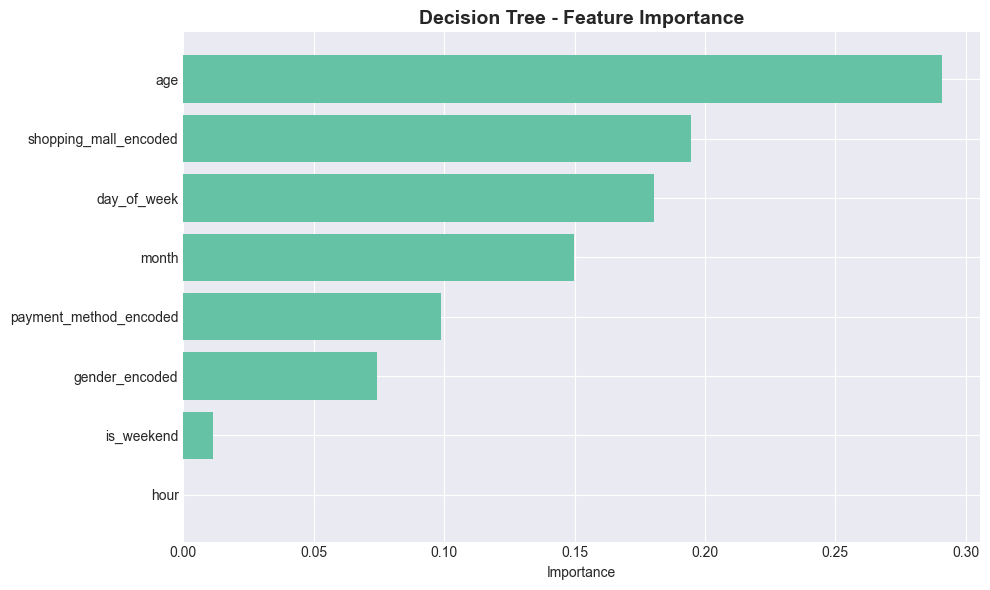


 Đã lưu: figures/01_dt_feature_importance.png


In [68]:
# Feature Importance
print("\n FEATURE IMPORTANCE:")
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.to_string(index=False))

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Decision Tree - Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('figures/01_dt_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n Đã lưu: figures/01_dt_feature_importance.png")


 VISUALIZE DECISION TREE:


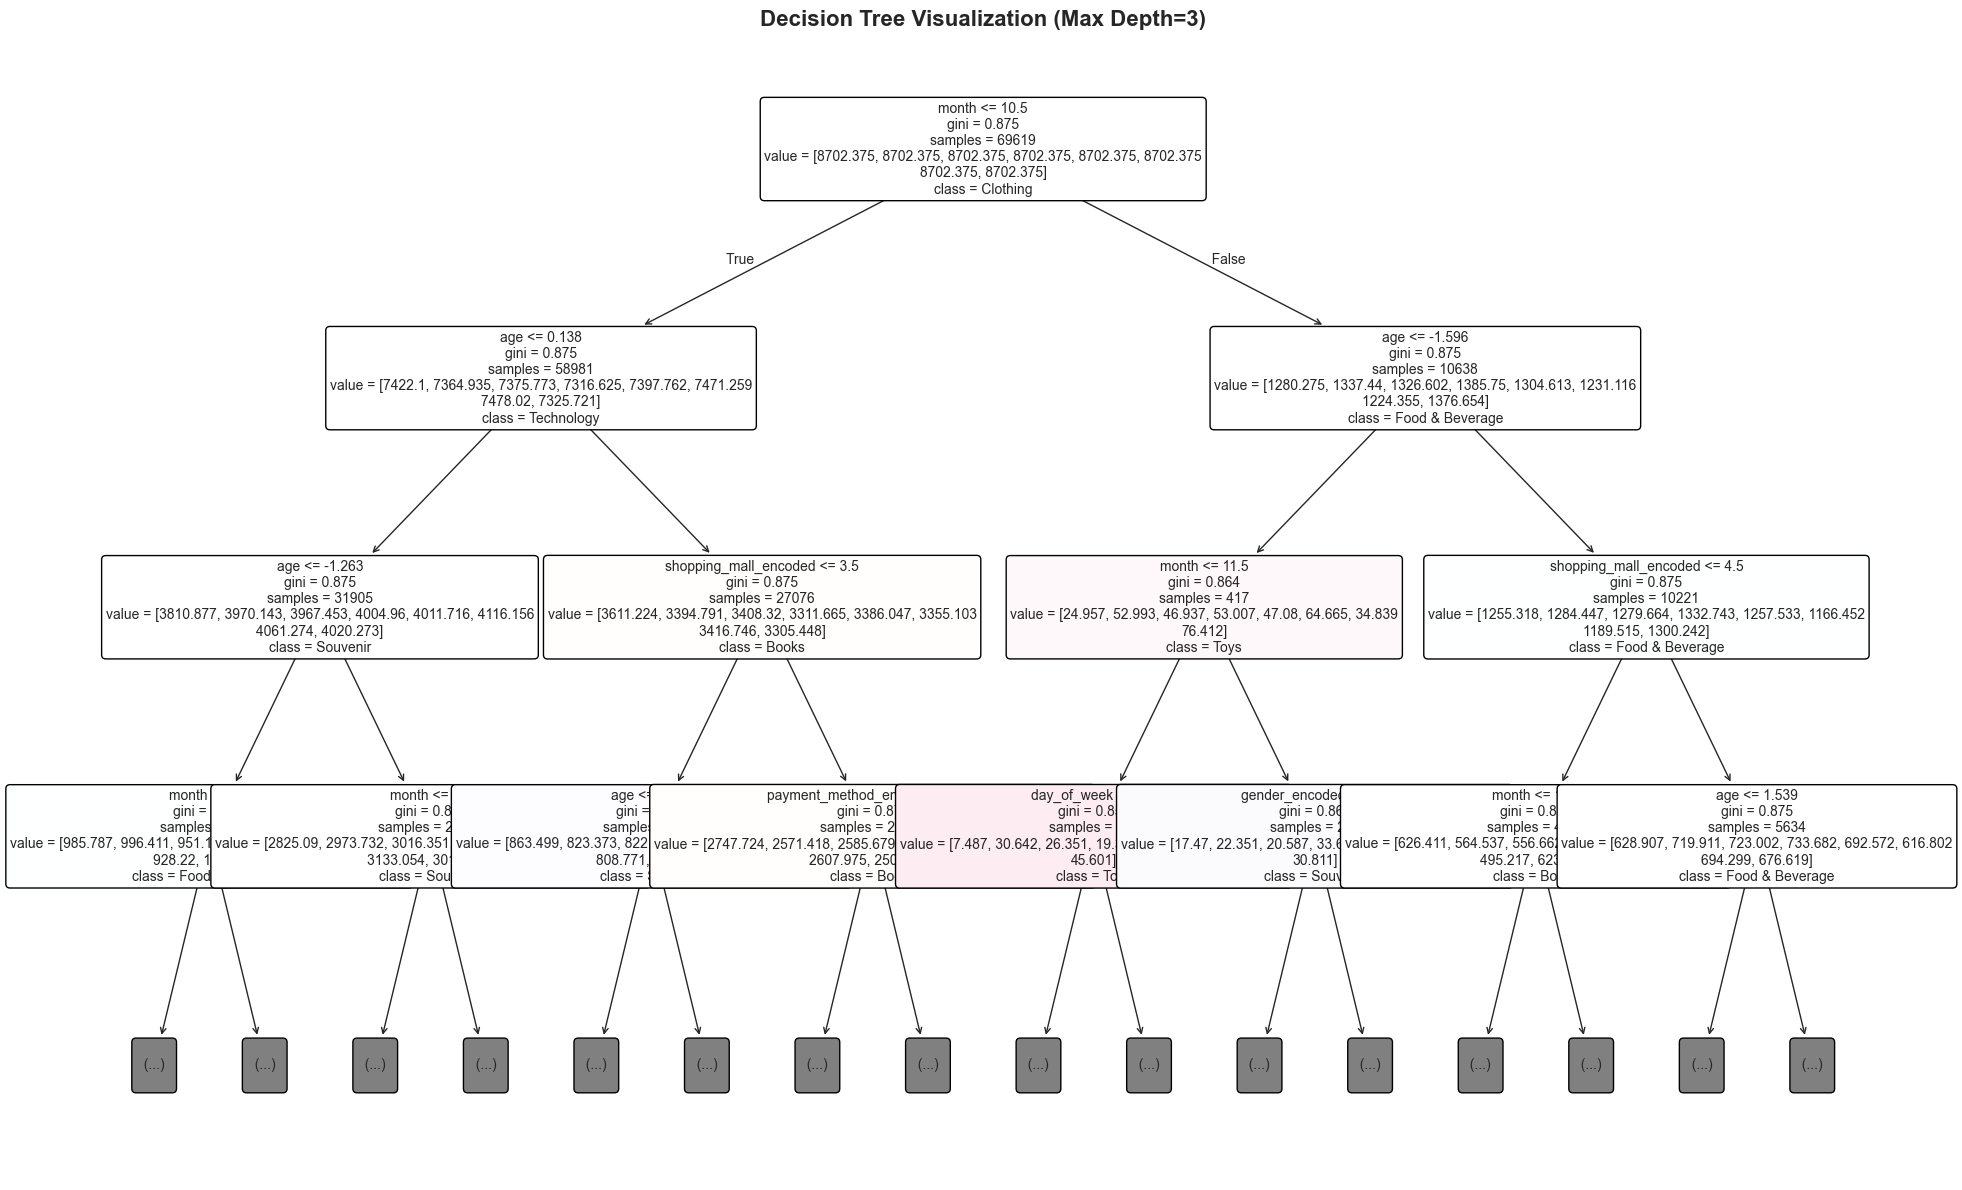

 Đã lưu: figures/02_decision_tree_viz.png


In [69]:
# Visualize Decision Tree
print("\n VISUALIZE DECISION TREE:")

plt.figure(figsize=(20, 12))
plot_tree(dt_model, 
          feature_names=X.columns,
          class_names=le_category.classes_,
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3)  
plt.title('Decision Tree Visualization (Max Depth=3)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('figures/02_decision_tree_viz.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Đã lưu: figures/02_decision_tree_viz.png")


 CONFUSION MATRIX:


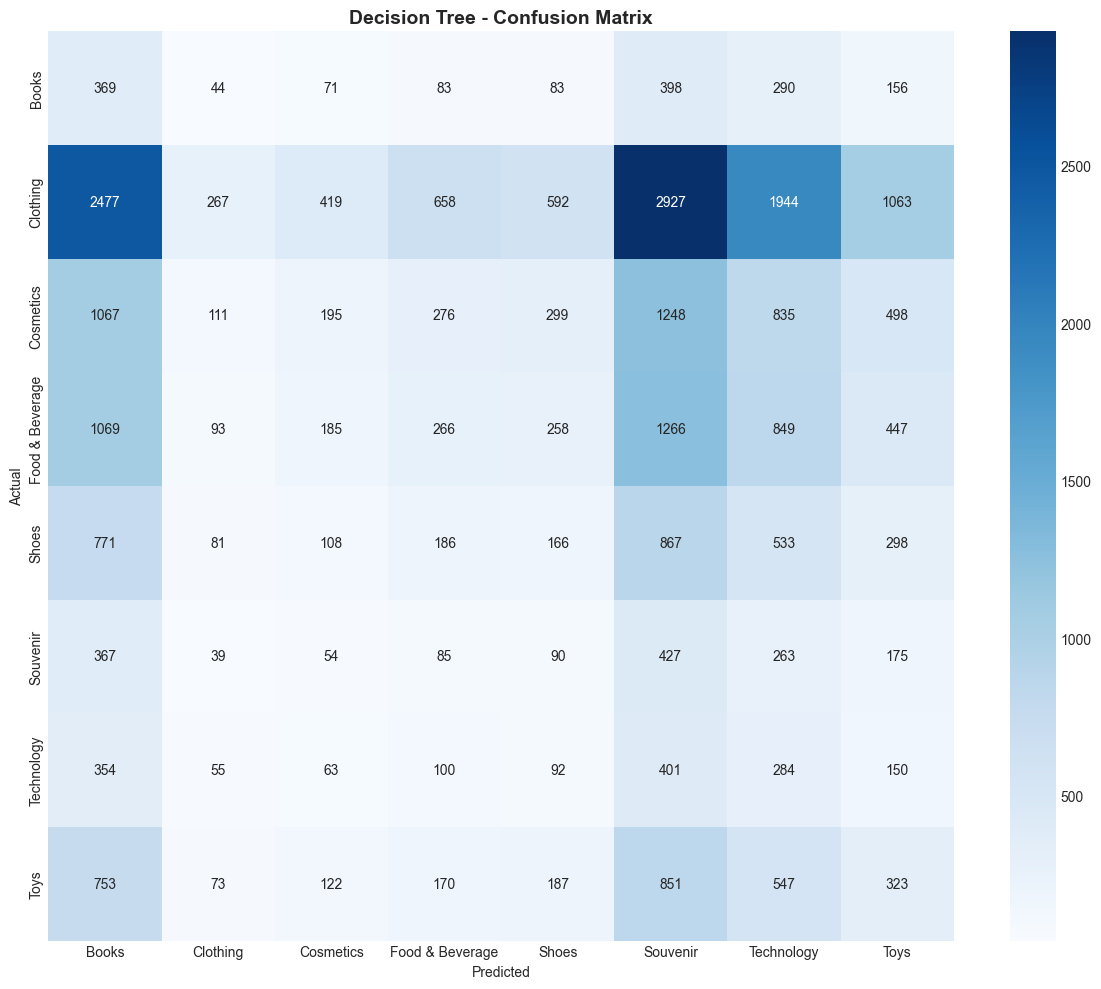

 Đã lưu: figures/03_dt_confusion_matrix.png


In [70]:
# Confusion Matrix
print("\n CONFUSION MATRIX:")

cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_category.classes_,
            yticklabels=le_category.classes_)
plt.title('Decision Tree - Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('figures/03_dt_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Đã lưu: figures/03_dt_confusion_matrix.png")

## 6. RANDOM FOREST CLASSIFIER

In [71]:
print("\n TRAINING RANDOM FOREST:")

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, 
                                  random_state=42, n_jobs=-1, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

print(f"\n  METRICS:")
print(f"  - Accuracy:  {rf_accuracy:.4f}")
print(f"  - Precision: {rf_precision:.4f}")
print(f"  - Recall:    {rf_recall:.4f}")
print(f"  - F1-Score:  {rf_f1:.4f}")



 TRAINING RANDOM FOREST:

  METRICS:
  - Accuracy:  0.1093
  - Precision: 0.1946
  - Recall:    0.1093
  - F1-Score:  0.1183


In [72]:
# Feature Importance
print("\n FEATURE IMPORTANCE:")
rf_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(rf_feature_importance.to_string(index=False))


 FEATURE IMPORTANCE:
               Feature  Importance
                   age    0.318610
                 month    0.207576
 shopping_mall_encoded    0.206681
           day_of_week    0.119296
payment_method_encoded    0.080715
        gender_encoded    0.049554
            is_weekend    0.017568
                  hour    0.000000


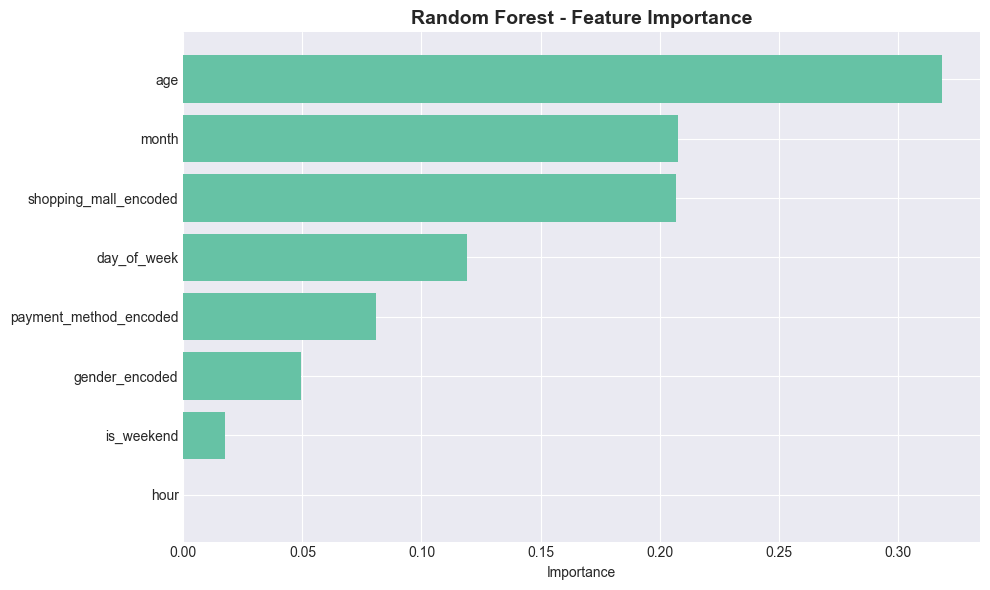


 Đã lưu: figures/04_rf_feature_importance.png


In [73]:
# Visualize
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance['Feature'], rf_feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest - Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('figures/04_rf_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n Đã lưu: figures/04_rf_feature_importance.png")

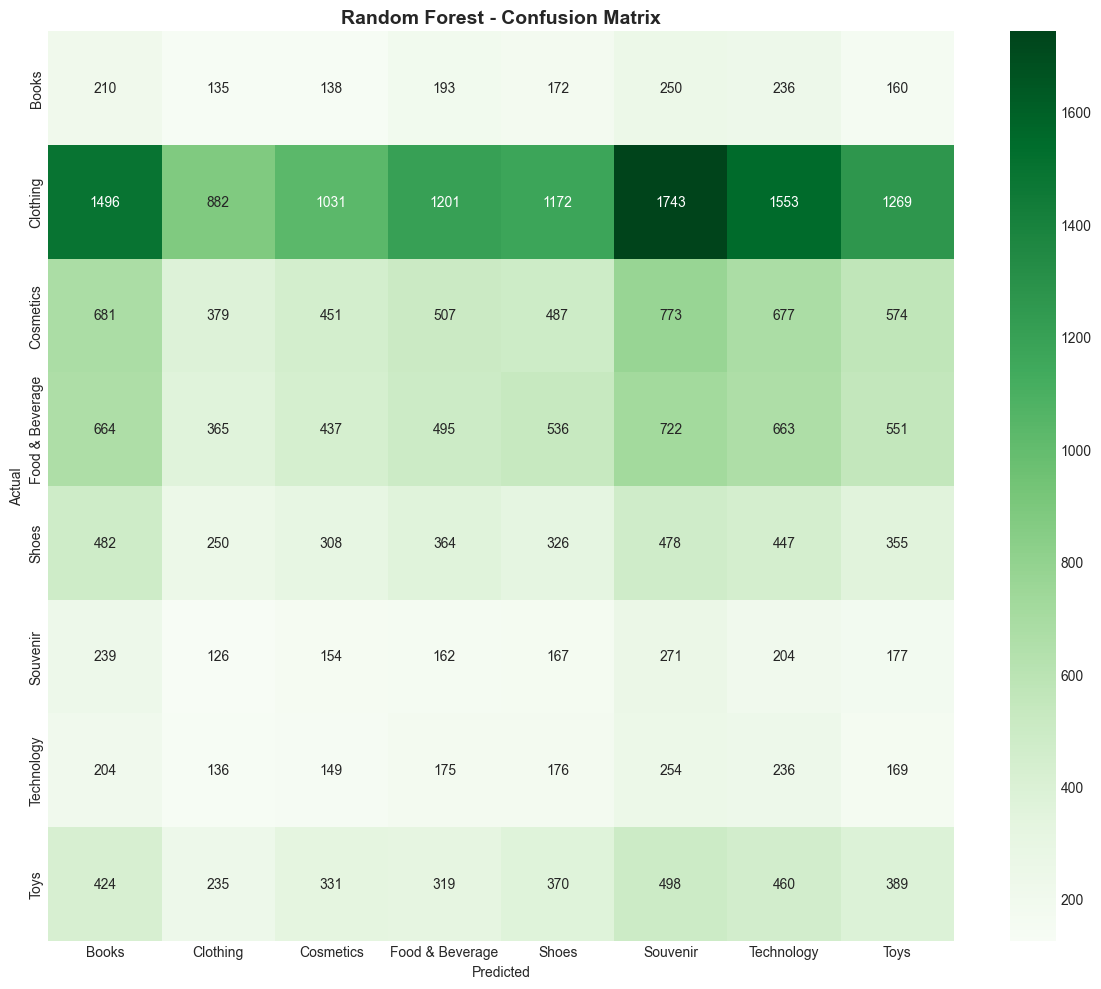

 Đã lưu: figures/05_rf_confusion_matrix.png


In [74]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=le_category.classes_,
            yticklabels=le_category.classes_)
plt.title('Random Forest - Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('figures/05_rf_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Đã lưu: figures/05_rf_confusion_matrix.png")

## 7. NAIVE BAYES CLASSIFIER

In [75]:
print("\n TRAINING NAIVE BAYES:")

n_classes = len(np.unique(y_train))

nb_model = GaussianNB(priors=[1/n_classes] * n_classes)
nb_model.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test)

# Metrics
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb, average='weighted')
nb_recall = recall_score(y_test, y_pred_nb, average='weighted')
nb_f1 = f1_score(y_test, y_pred_nb, average='weighted')

print(f"\n  METRICS:")
print(f"  - Accuracy:  {nb_accuracy:.4f}")
print(f"  - Precision: {nb_precision:.4f}")
print(f"  - Recall:    {nb_recall:.4f}")
print(f"  - F1-Score:  {nb_f1:.4f}")


 TRAINING NAIVE BAYES:

  METRICS:
  - Accuracy:  0.0968
  - Precision: 0.1884
  - Recall:    0.0968
  - F1-Score:  0.0995


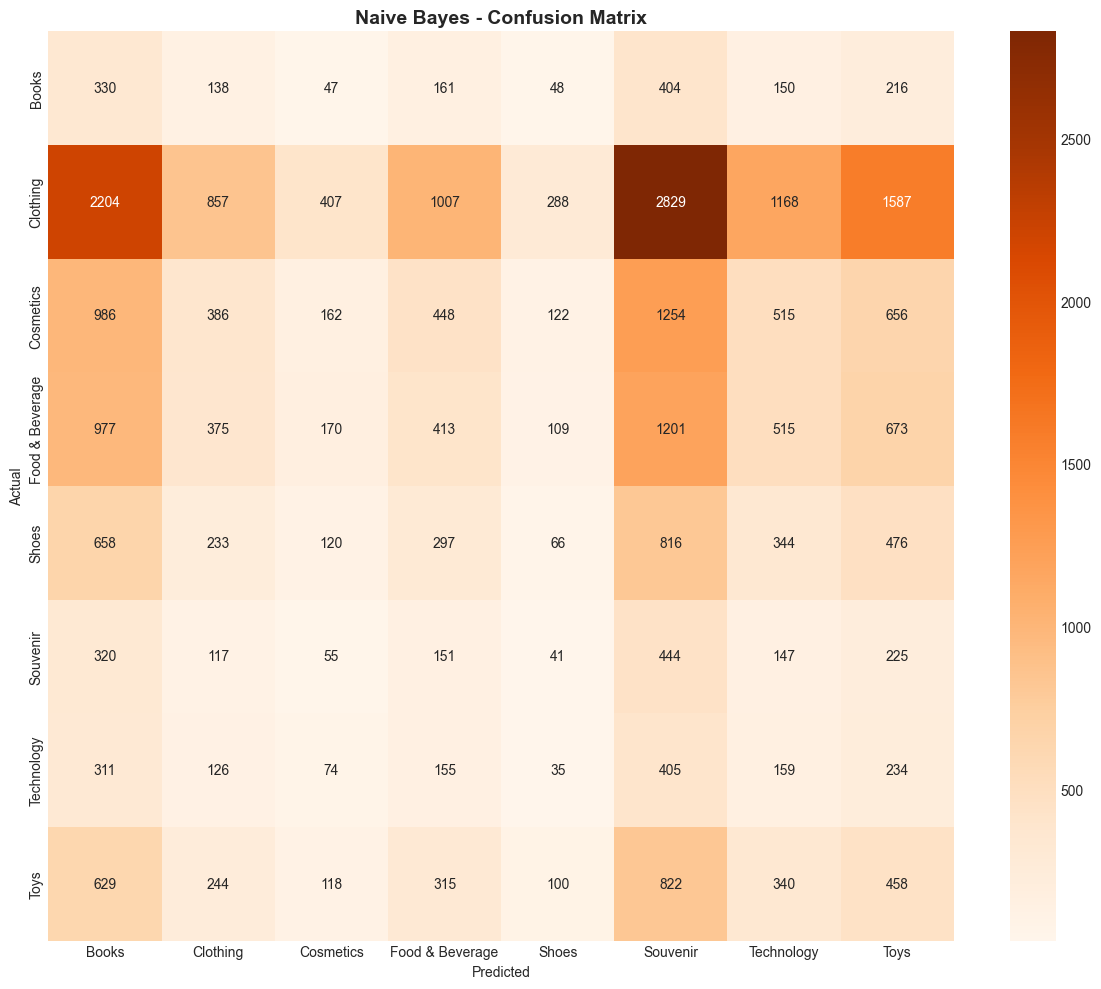

 Đã lưu: figures/06_nb_confusion_matrix.png


In [76]:
# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=le_category.classes_,
            yticklabels=le_category.classes_)
plt.title('Naive Bayes - Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('figures/06_nb_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Đã lưu: figures/06_nb_confusion_matrix.png")